First, import the processing tools that contain classes and methods to read, plot and process standard unit particle distribution files. 

In [1]:
from particle_distribution import processing_tools_mult_class as pt


The module consists of a class 'ParticleDistribution' that initializes to a dictionary containing the following entries given a filepath:

|key | value     |
|----|-----------|
|'x' | x position|
|'y' | y position|
|'z' | z position|
|'px'| x momentum|
|'py'| y momentum|
|'pz'| z momentum|
|'NE'| number of electrons per macroparticle|

The units are in line with the Standard Unit specifications, but can be converted to SI by calling the class method SU2SI

Values can then be called by calling the 'directory', which is a dictionary:

In [59]:
filepath = '/home/daniel_b/Documents/Summer_project/example.h5'

data = pt.ParticleDistribution(filepath)
data.SU2SI
data.directory['x']

array([  1.20390857e-05,   1.19987648e-05,  -5.26944824e-05, ...,
        -1.00743962e-05,  -2.33553430e-06,  -8.14314855e-05])

Alternatively one can ask for a pandas dataframe where each column is one of the above properties of a macroparticle per row.

In [60]:
panda_data = data.DistFrame()
panda_data[0:5]

,NE,px,py,pz,x,y,z
0,31210.986267,0.006629,-0.000466,468.491974,0.000012,-0.000009,49.293173
1,31210.986267,0.007306,0.001122,466.837388,0.000012,-0.000057,49.293423
2,31210.986267,0.008277,-0.000318,470.839422,-0.000053,-0.000002,49.292852
3,31210.986267,0.008169,0.005924,465.713097,0.000024,-0.000049,49.293612
4,31210.986267,0.010275,0.001735,472.664255,-0.000079,0.000025,49.292614


This allows for quick plotting using the inbuilt pandas methods

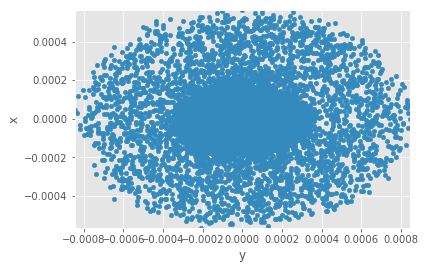

In [72]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot') #optional

x_axis = 'y'
y_axis = 'x'


plot = panda_data.plot(kind='scatter',x=x_axis,y=y_axis)
#sets axis limits  
plot.set_xlim([panda_data[x_axis].min(),panda_data[x_axis].max()])
plot.set_ylim([panda_data[y_axis].min(),panda_data[y_axis].max()])
plt.show(plot)

If further statistical analysis is required, the class 'Statistics' is provided. This contains methods to process standard properties of the electron bunch. This is called by giving a filepath to 'Statistics' The following operations can be performed:

| Function            | Effect and directory keys                                                                                                     |
|---------------------|-------------------------------------------------------------------------------------------------------------------------------|
| Calculate_Emittance | Calculates the emittance of all the slices, accessible by 'e_x' and 'e_y'                                                     |
| CoM                 | Calculates the weighed averages and standard deviations per slice of every parameter and beta functions, see below for keys.  |
| get_current         | Calculates current per slice, accessible in the directory as 'current'.                                                       |
|Slice | Slices the data in equal slices of an integer number. |

This is a subclass of the ParticleDistribution and all the methods previously described work.


| CoM Keys                | Parameter (per slice)                                      |
|------------------------|------------------------------------------------------------|
| CoM_x, CoM_y, CoM_z    | Centre of mass of x, y, z positions                        |
| std_x, std_y, std_z    | Standard deviation of x, y, z positions                    |
| CoM_px, CoM_py, CoM_pz | Centre of mass of x, y, z momenta                          |
| std_px, std_py, std_pz | Standard deviation of x, y, z momenta                      |
| beta_x, beta_y         | Beta functions (assuming Gaussian distribution) in x and y |


Furthermore, there is a 'Step_Z' which returns the size of a slice as well as 'z_pos' which gives you central position of a given slice.

And from this class both the DistFrame (containing the same data as above) and StatsFrame can be called:

In [62]:
stats = pt.Statistics(filepath)

#preparing the statistics
stats.Slice(100)
stats.Calculate_Emittance()
stats.CoM()
stats.get_current()

#display pandas example
panda_stats = stats.StatsFrame()
panda_stats[0:5]

,CoM_px,CoM_py,CoM_pz,CoM_x,CoM_y,CoM_z,beta_x,beta_y,current,e_x,e_y,slice_z,std_px,std_py,std_pz,std_x,std_y,std_z,z_pos
0,1.090988e-24,-9.604622e-26,1.302979e-19,-0.000034,-0.000007,49.292099,0.235018,0.655127,4.635644,1.390731e-07,1.365778e-07,49.292098,6.944301e-25,3.385691e-24,1.315555e-23,0.000109,0.000180,0.000005,49.292098
1,1.119572e-24,3.881272e-25,1.302565e-19,-0.000041,0.000019,49.292115,0.180635,0.827244,5.751632,1.297608e-07,1.489005e-07,49.292115,8.234089e-25,3.774013e-24,1.259130e-23,0.000092,0.000211,0.000005,49.292115
2,1.093419e-24,-1.290899e-25,1.302164e-19,-0.000032,-0.000007,49.292133,0.106912,0.409024,10.387276,2.116124e-07,1.782308e-07,49.292133,9.638639e-25,2.905490e-24,1.109932e-23,0.000090,0.000162,0.000005,49.292133
3,1.187010e-24,-1.562527e-25,1.301782e-19,-0.000034,-0.000010,49.292151,0.071391,0.316972,12.619253,1.981626e-07,1.770423e-07,49.292150,1.076412e-24,2.479309e-24,1.108139e-23,0.000071,0.000142,0.000005,49.292150
4,1.206306e-24,-1.290574e-25,1.301406e-19,-0.000035,-0.000011,49.292168,0.080260,0.435046,13.306015,1.717004e-07,1.798360e-07,49.292168,1.242799e-24,2.735644e-24,1.122382e-23,0.000071,0.000168,0.000005,49.292168


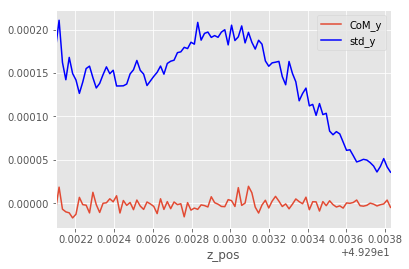

In [6]:
ax = panda_stats.plot(x='z_pos',y='CoM_y')
_b = panda_stats.plot(ax=ax, x='z_pos',y='std_y',c='b')

plt.show()


And finally there is the FEL_Approximations which calculate simple FEL properties per slice. This is a subclass of statistics and as such every method described above is callable.

This class conatins the 'undulator' function that calculates planar undulator parameters given a period and either a peak magnetic field or K value.

The data must be sliced and most statistics have to be run before the other calculations can take place.
These are 'pierce' which calculates the pierce parameter and 1D gain length for a given slice, 'gain length' which calculates the Ming Xie gain and returns three entries in the directory 'MX_gain', '1D_gain', 'pierce', which hold an array for these values per slice. 
'FELFrame' returns a pandas dataframe with these and 'z_pos' for reference.

To make this easier, the class ProcessedData takes a filepath, number of slcies, undulator period, magnetic field or K and performs all the necessary steps automatically. As this is a subclass of FEL_Approximations all the values written above are accessible from here.

In [31]:
FEL = pt.ProcessedData(filepath,num_slices=100,undulator_period=0.00275,k_fact=2.7)

panda_FEL = FEL.FELFrame()
panda_stats= FEL.StatsFrame()
panda_FEL[0:5]

,1D_gain,MX_gain,pierce,z_pos
0,0.663068,2.806309e+07,0.000191,49.292098
1,0.615747,4.773164e+07,0.000205,49.292115
2,0.460577,2.203503e+08,0.000274,49.292133
3,0.382122,3.744164e+08,0.000331,49.292150
4,0.395079,2.084933e+08,0.000320,49.292168


If it is important to plot the statistical data alongside the FEL data, that can be easily achieved by concatinating the two sets as shown below

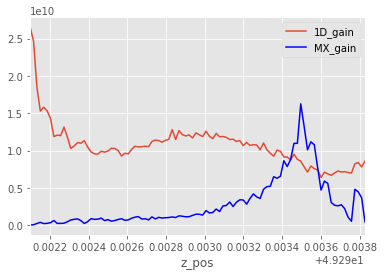

In [58]:
import pandas as pd

cat = pd.concat([panda_FEL,panda_stats], axis=1, join_axes=[panda_FEL.index])
cat['1D_gain']=cat['1D_gain']*40000000000
az = cat.plot(x='z_pos',y='1D_gain')
_b = cat.plot(ax=az, x='z_pos',y='MX_gain',c='b')
plt.show()
